# **Метод K-ближайших соседей**
К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

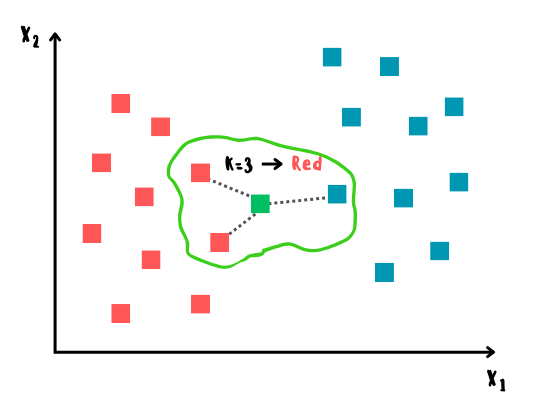

### **Принцип работы KNN**
Алгоритм строится следующим образом:
- 1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;
- 2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;
- 3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;
- 4) предыдущие шаги повторяются для всех тестовых образцов.

Существует множество метрик для вычисления расстояния между объектами, среди которых наиболее популярными являются следующие:
- Евклидово расстояние — это наиболее простая и общепринятая метрика, которая определяется как длина отрезка между двумя объектами $a$ и $b$ в пространстве с $n$ признаками и вычисляется по формуле:

$$d(a, b) = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}$$

- Манхэттенское расстояние — метрика, которая определяется как сумма модулей разностей координат двух точек в пространстве между двумя объектами $a$ и $b$ с $n$ признаками и вычисляется по формуле:

$$d(a, b) = \sum_{i=1}^n |a_i - b_i|$$

- Косинусное расстояние — метрика, которая определяется как угол между двумя векторами $a$ и $b$ в пространстве с $n$ признаками и вычисляется по формуле:

$$d(a, b) = 1 - \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^n a_i^2} \sqrt{\sum_{i=1}^n b_i^2}}$$

### **Более быстрые оптимизации**
Описанный выше тип KNN называется **Brute-Force**, поскольку в нём используется метод полного перебора для поиска ближайших соседей, что делает его простым в реализации, но слишком медленным при работе с большим объемом данных. Для решения данной проблемы в реализации scikit-learn предусмотрены более продвинутые методы, основанные на бинарных деревьях, что позволяет получить значительный прирост в производительности.

#### **BallTree**
BallTree — это древовидная структура, в основе которой лежит разбиение исходного пространства данных на вложенные гиперсферы, что позволяет более эффективно отсекать большие области пространства, в которых отсутствуют ближайшие соседи для точек. В большинстве случаев такой алгоритм подходит для данных с произвольной метрикой расстояния.

**Построение BallTree состоит из следующих шагов**:
- 1) из множества точек выбирается одна случайным образом и для неё находится самая дальняя точка;
- 2) далее все точки разбиваются на гиперсферы (узлы) по ближайшему расположению к двум точкам из шага 1;
- 3) затем данный процесс повторяется рекурсивно для каждой гиперсферы, пока в ней не останется определённое количество точек или не будет достигнута заданная глубина дерева.

При поиске k-ближайших соседей для новой точки, алгоритм сравнивает расстояние от заданной точки до центра каждого дочернего узла и оставляет лишь те, в которых данное расстояние меньше радиуса узлов.

Для оценки качества полученной древовидной структуры и её дальнейшей оптимизации очень полезной будет информация о пересекающихся гиперсферах (узлах) A и B в метрике M, расстояние между которыми можно определить следующим образом:

$$d_M(A, B) = \max(0, d_M(c_A, c_{B}) - r_A - r_{B})$$

где $c_A$ и $c_{B}$ — центры сфер, а $r_A$ и $r_{B}$ — их радиусы.

В данном случае оптимизация BallTree с учётом пересекающихся гиперсфер (узлов) может включать в себя следующие подходы:
- балансировка дерева: поскольку пересечение гиперсфер может указывать на несбалансированность дерева, перебалансировка его узлов позволяет улучшить эффективность поиска, минимизируя количество посещаемых узлов;
- выбор оптимального размера листа: в случае сильного пересечения гиперсфер, увеличение размера листа может уменьшить количество узлов, что также ускорит поиск;
- слияние узлов: полезно при значительном пересечении, что также уменьшает их общее количество и используется в предыдущих пунктах;
- выбор порядка обхода: информация о структуре пересечения может сделать более эффективным порядок посещаемых узлов, начиная проверку с наиболее вероятных кандидатов.

Стоит отметить, что описанные методы оптимизации плюс-минус похожим образом могут быть применимы и для алгоритма ниже.

#### **KD-Tree**
KD-Tree (k-dimensional tree) — ещё одна древовидная структура, отдалённо напоминающая BallTree, однако в данном случае используются гиперплоскости для разбиения точек вместо гиперсфер, что позволяет также эффективно оставлять лишь те области пространства данных, в которых могут присутствовать ближайшие соседи. Обычно KD-Tree больше подходит для данных с евклидовой или манхэттенской метрикой расстояния.

**Построение KD-Tree состоит из следующих шагов**:

- 1) из множества точек выбирается одна из координат (обычно поочередно для каждого уровня дерева, но можно и случайным образом) и по ней вычисляется медиана;
- 2) далее все точки разбиваются на два узла (подмножества) по отношению к медиане: на те, у которых значение выбранной координаты меньше либо равно медиане, и на те, у которых больше;
- 3) данный процесс повторяется рекурсивно для каждого узла, пока в нём не останется определённое количество точек или не будет достигнута заданная глубина дерева.

При поиске ближайших соседей для новой точки, алгоритм сравнивает значение заданной точки с медианой в каждом узле, выбирая таким образом ближайшее подпространство, которое будет листом с ближайшими соседями. Возвращаясь обратно к корню, алгоритм будет сравнивать точки в текущем узле с ближайшими соседями и обновлять их значения в случае нахождения более близких к заданной точке.

Стоит также добавить, что KNN может применяться в контексте обучения без учителя, например в задачах кластеризации для вычисления расстояний между признаками, как в алгоритме DBSCAN, речь о котором пойдёт немного позже. Для этого в scikit-learn существует специальный класс NearestNeighbors.

### **Реализация на Python с нуля**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)   # distances to all neighbors
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]   # k-nearest neighbors target values

        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Загрузка датасетов**

In [ ]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### **Обучение моделей и оценка полученных результатов**
KNN показал хороший результат в случае классификации. Также можно заметить, что алгоритм способен выстраивать нелинейные решающие границы, что позволяет ему также достигать хороших результатов с данными, в которых прослеживается нелинейная зависимость.

Однако, стоит обратить внимание на случай регрессии: низкий r2-score обусловлен небольшим числом ближайших соседей по умолчанию. Если увеличить число соседей до 30, то и r2-score увеличится более чем в 2 раза, что говорит о важности подбора оптимального числа ближайших соседей.

**KNN classifier**

In [ ]:
knn_clf = KNearestNeighbors()
knn_clf.fit(X1_train, y1_train)
knn_clf_pred_res = knn_clf.predict(X1_test)
knn_clf_accuracy = accuracy_score(y1_test, knn_clf_pred_res)

print(f'KNN classifier accuracy: {knn_clf_accuracy:}')
print(knn_clf_pred_res)

KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


**KNN regressor**

In [ ]:
knn_reg = KNearestNeighbors(regression=True)
knn_reg.fit(X2_train, y2_train)
knn_reg_pred_res = knn_reg.predict(X2_test)
knn_reg_r2 = r2_score(y2_test, knn_reg_pred_res)

print(f'KNN regressor R2 score: {knn_reg_r2}')
print(knn_reg_pred_res)

KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]


**KNN classifier (scikit-learn)**

sk KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


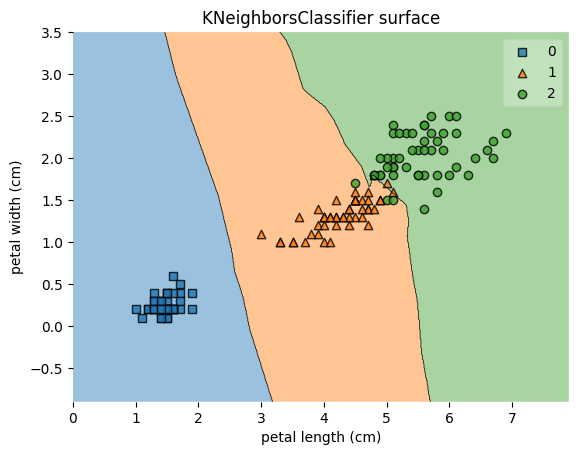

In [ ]:
sk_knn_clf = KNeighborsClassifier()
sk_knn_clf.fit(X1_train, y1_train)
sk_knn_clf_pred_res = sk_knn_clf.predict(X1_test)
sk_knn_clf_accuracy = accuracy_score(y1_test, sk_knn_clf_pred_res)

print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
print(sk_knn_clf_pred_res)

feature_indexes = [2, 3]
title1 = 'KNeighborsClassifier surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_knn_clf, feature_indexes, title1)

**KNN regressor (scikit-learn)**

In [ ]:
sk_knn_reg = KNeighborsRegressor()
sk_knn_reg.fit(X2_train, y2_train)
sk_knn_reg_pred_res = sk_knn_reg.predict(X2_test)
sk_knn_reg_r2 = r2_score(y2_test, sk_knn_reg_pred_res)

print(f'sk KNN regressor R2 score: {sk_knn_reg_r2}')
print(sk_knn_reg_pred_res)

sk KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]


### **Преимущества и недостатки KNN**
Преимущества:
- простота в реализации и интерпретации;
- применяется во многих задачах, особенно в рекомендательных системах;
- высокая точность прогнозов при правильном подборе k и метрики расстояния.

Недостатки:
- большое потребление памяти и низкая скорость работы из-за хранения и вычисления расстояний между всеми обучающими и тестовыми образцами (имеется в виду KNN в чистом виде);
- чувствительность к выбросам и шуму, а также к несбалансированным классам в данных;
- при большом количестве признаков может возникнуть проблема совпадения метрической и смысловой близости объектов, что решается с помощью обучения представлений (численное описание объектов).

### **Дополнительные источники**
Статьи:
- «Brute-Force k-Nearest Neighbors Search on the GPU», Shengren Li and Nina Amenta;
- «Unsupervised Space Partitioning for Nearest Neighbor Search», Abrar Fahim, Mohammed Eunus Ali and Muhammad Aamir Cheema;
- «Five Balltree Construction Algorithms», Omohundro, S.M.;
- «Ball*-tree: Efficient spatial indexing for constrained nearest-neighbor search in metric
spaces», Mohamad Dolatshah, Ali Hadian and Behrouz Minaei-Bidgoli;
- «Developments in KD Tree and KNN Searches», Vijay R. Tiwari.

Документация:
- [описание KNN](https://scikit-learn.org/stable/modules/neighbors.html#classification);
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html);
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html).

Видео: [один](https://www.youtube.com/watch?v=gcM3QfVHhOo), [два](https://www.youtube.com/watch?v=09mb78oiPkA), [три](https://www.youtube.com/watch?v=fy40y3UFkNE).

